### Monte Carlo Simulation of Stock Price Prediction
In stock investment, one major interest of investors is to estimate the future stock movement. While there are various theories developed to predict stock movement based on historical prices, Random Walk Theory suggests that there is no relationship between the current stock prices and the future prices. The fluctuation of the stock price is simply a random event but not influenced by past events.

**Random Walk Theory:** Random walk theory suggests that changes in stock prices have the same distribution and are independent of each other. Therefore, it assumes the past movement or trend of a stock price or market cannot be used to predict its future movement. In short, random walk theory proclaims that stocks take a random and unpredictable path that makes all methods of predicting stock prices futile in the long run.

Here we will use Python to simulate the Random Walk of a stock price via Monte Carlo Simulation.

**Monte Carlo Simulation:** A Monte Carlo simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present.

The aim of this Monte Carlo Simulation is to generate a series of simulated stock prices from the Random Walk events. These simulated stock prices will give us an idea of the estimated stock returns we can gain while bearing a certain degree of risk.

### Importing Dependencies

In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
start = dt.datetime(2011, 1, 1)
end = dt.datetime(2021, 1, 1)

In [3]:
stock_data = yf.download('MSFT', start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,28.049999,28.18,27.920000,27.98,21.708210,53443800
2011-01-04,27.940001,28.17,27.850000,28.09,21.793552,54405600
2011-01-05,27.900000,28.01,27.770000,28.00,21.723726,58998700
2011-01-06,28.040001,28.85,27.860001,28.82,22.359928,88026300
2011-01-07,28.639999,28.74,28.250000,28.60,22.189234,73762000


In [5]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,221.419998,223.610001,221.199997,222.750000,217.364563,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,219.521133,17933500
2020-12-29,226.309998,227.179993,223.580002,224.149994,218.730713,17403200
2020-12-30,225.229996,225.630005,221.470001,221.679993,216.320419,20272300
2020-12-31,221.699997,223.000000,219.679993,222.419998,217.042511,20942100


### Estimation of Daily Volatility of Stock
We will make another presumption that the volatility level of the stock in the past will continue into the future. Hence, we first need to estimate the daily volatility of the stock.

In [6]:
returns = stock_data['Adj Close'].pct_change()
daily_vol = returns.std()

### Running Single Simulation
To enable us to understand better the working mechanism of Monte Carlo Simulation, let’s try running just a single simulation to generate our first set of simulated stock prices for one year (252 trading days).

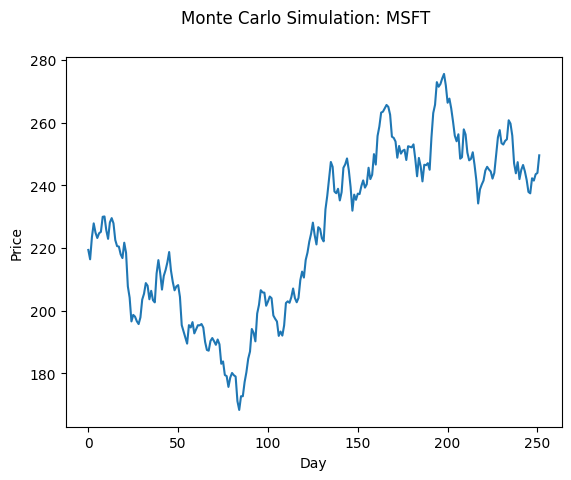

In [12]:
T = 252
count = 0
price_list = []
last_price = stock_data['Adj Close'][-1]

price = last_price * (1 + np.random.normal(0, daily_vol))
price_list.append(price)

for y in range(T):
    if count == 251:
        break
    price = price_list[count]* (1 + np.random.normal(0, daily_vol))
    price_list.append(price)
    count += 1

fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: MSFT")
plt.plot(price_list)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

Now, we can re-run our existing codes again and we shall see another series of simulated prices plotted on the chart.

As we can see from the results above, we can see each round of Monte Carlo Simulation will give us a very different pattern of simulated stock prices. These individual charts alone might not be useful to predict the future stock prices as none of them can be representative enough to approximate the future stock prices.

However, we can imagine if we repeatedly run the same Monte Carlo Simulation thousands of times, the range and the mean of simulated prices will give us an insight into the potential minimum & maximum of the future stock prices and also the expected stock returns.

### Running Multiple Simulations
Instead of doing it manually, we are going to enable our Python program to automatically re-run our Monte Carlo Simulation one thousand times. Besides, we will also overlay each of the simulated line plots from every round of simulation onto the same chart.

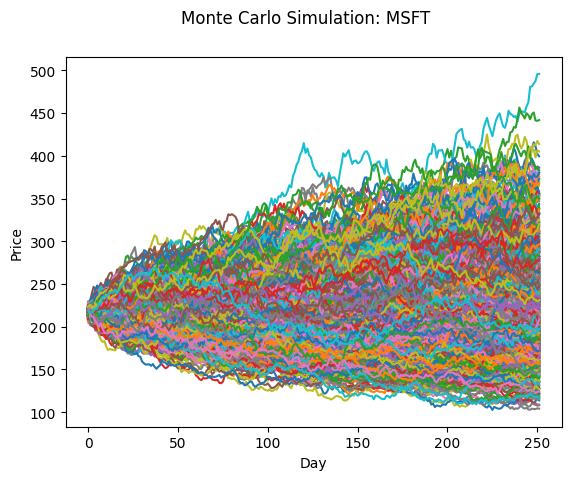

In [8]:
NUM_SIMULATIONS =  1000
df = pd.DataFrame()
last_price_list = []
for x in range(NUM_SIMULATIONS):
    count = 0
    price_list = []
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_list.append(price)

    for y in range(T):
        if count == 251:
            break
        price = price_list[count]* (1 + np.random.normal(0, daily_vol))
        price_list.append(price)
        count += 1

    df[x] = price_list
    last_price_list.append(price_list[-1])

fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: MSFT")
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

### Analysis of Simulated Stock Prices
There are few simple statistical measures that can be useful for us:
- Mean of the simulated last prices
- Quantile (5%) and Quantile (95%) of the simulated last prices



In [9]:
print("Expected price: ", round(np.mean(last_price_list),2))
print("Quantile (5%): ",np.percentile(last_price_list,5))
print("Quantile (95%): ",np.percentile(last_price_list,95))

Expected price:  218.57
Quantile (5%):  142.68098745610826
Quantile (95%):  320.9493228091669


From the result above, we can see there is a 5% of probability that the stock price will be below 142.23  and a 5% of probability the price will be above 327.51. Our expected stock price at the year-end is 221.21.

To give us a better view of our simulated last prices distribution, we can plot a histogram.

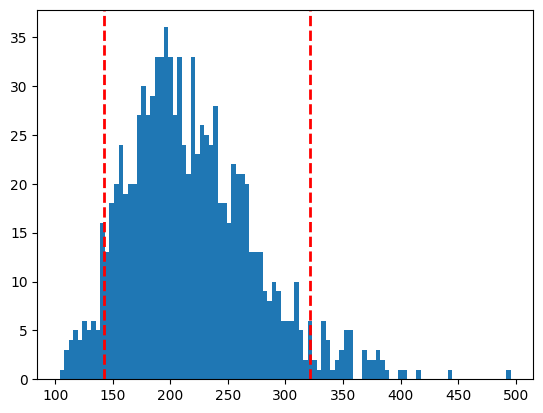

In [10]:
plt.hist(last_price_list,bins=100)
plt.axvline(np.percentile(last_price_list,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(last_price_list,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

We may ask ourselves if we are willing to risk our investment on a stock with a 5% of chance the price will drop below 142.23 and with an expected stock price at 221.21? The current result of the simulation has given us a much better insight to help with our investment decision making.